In [4]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [9]:
df = pd.read_csv("diabetes.csv")

In [10]:
# Eye ball the imported dataset
df.head()

,Pregnancies,Plasma glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check dimension of dataset

In [11]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Plasma glucose              768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check distribution of dependent variable, Outcome and plot it (1 Marks)

In [13]:
pd.value_counts(df["Class"])

0    500
1    268
Name: Class, dtype: int64

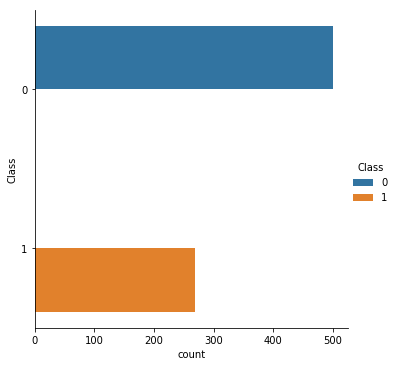

In [14]:
sns.catplot(y="Class",hue="Class",data=df,kind="count",orient="v")

As you can see, there is a over-representation of "Class = 0". there is a good chance of having relatively high false negatives.( class = 1 is predicted as class = 0 ) 

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [15]:
df.dtypes

Pregnancies                   int64
Plasma glucose                int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [16]:
# Check data types and info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Plasma glucose              768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
# Check for null values
Dia_null_df = pd.DataFrame(df.isna(), columns = df.columns)
for i in df.columns:
    null = Dia_null_df[(Dia_null_df[i] == True)]
    if null.empty == True:
        print("No null values in", i)
    else:
        print(null.head())

No null values in Pregnancies
No null values in Plasma glucose
No null values in BloodPressure
No null values in SkinThickness
No null values in Insulin
No null values in BMI
No null values in DiabetesPedigreeFunction
No null values in Age
No null values in Class


### Check data distribution using summary statistics and provide your findings(2 Marks)

In [21]:
df.groupby(by="Class").describe().T

Class                                    0           1
Age                      count  500.000000  268.000000
                         mean    31.190000   37.067164
                         std     11.667655   10.968254
                         min     21.000000   21.000000
                         25%     23.000000   28.000000
                         50%     27.000000   36.000000
                         75%     37.000000   44.000000
                         max     81.000000   70.000000
BMI                      count  500.000000  268.000000
                         mean    30.304200   35.142537
                         std      7.689855    7.262967
                         min      0.000000    0.000000
                         25%     25.400000   30.800000
                         50%     30.050000   34.250000
                         75%     35.300000   38.775000
                         max     57.300000   67.100000
BloodPressure            count  500.000000  268.000000
                         mean    68.184000   70.824627
                         std     18.063075   21.491812
                         min      0.000000    0.000000
                         25%     62.000000   66.000000
                         50%     70.000000   74.000000
                         75%     78.000000   82.000000
                         max    122.000000  114.000000
DiabetesPedigreeFunction count  500.000000  268.000000
                         mean     0.429734    0.550500
                         std      0.299085    0.372354
                         min      0.078000    0.088000
                         25%      0.229750    0.262500
                         50%      0.336000    0.449000
...                                    ...         ...
Insulin                  std     98.865289  138.689125
                         min      0.000000    0.000000
                         25%      0.000000    0.000000
                         50%     39.000000    0.000000
                         75%    105.000000  167.250000
                         max    744.000000  846.000000
Plasma glucose           count  500.000000  268.000000
                         mean   109.980000  141.257463
                         std     26.141200   31.939622
                         min      0.000000    0.000000
                         25%     93.000000  119.000000
                         50%    107.000000  140.000000
                         75%    125.000000  167.000000
                         max    197.000000  199.000000
Pregnancies              count  500.000000  268.000000
                         mean     3.298000    4.865672
                         std      3.017185    3.741239
                         min      0.000000    0.000000
                         25%      1.000000    1.750000
                         50%      2.000000    4.000000
                         75%      5.000000    8.000000
                         max     13.000000   17.000000
SkinThickness            count  500.000000  268.000000
                         mean    19.664000   22.164179
                         std     14.889947   17.679711
                         min      0.000000    0.000000
                         25%      0.000000    0.000000
                         50%     21.000000   27.000000
                         75%     31.000000   36.000000
                         max     60.000000   99.000000

[64 rows x 2 columns]

As you can see, there are outliers almost in all columns when you compare the mean, median & Quartile and lets confirm it with Box plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5EE837CC0>,
      dtype=object)

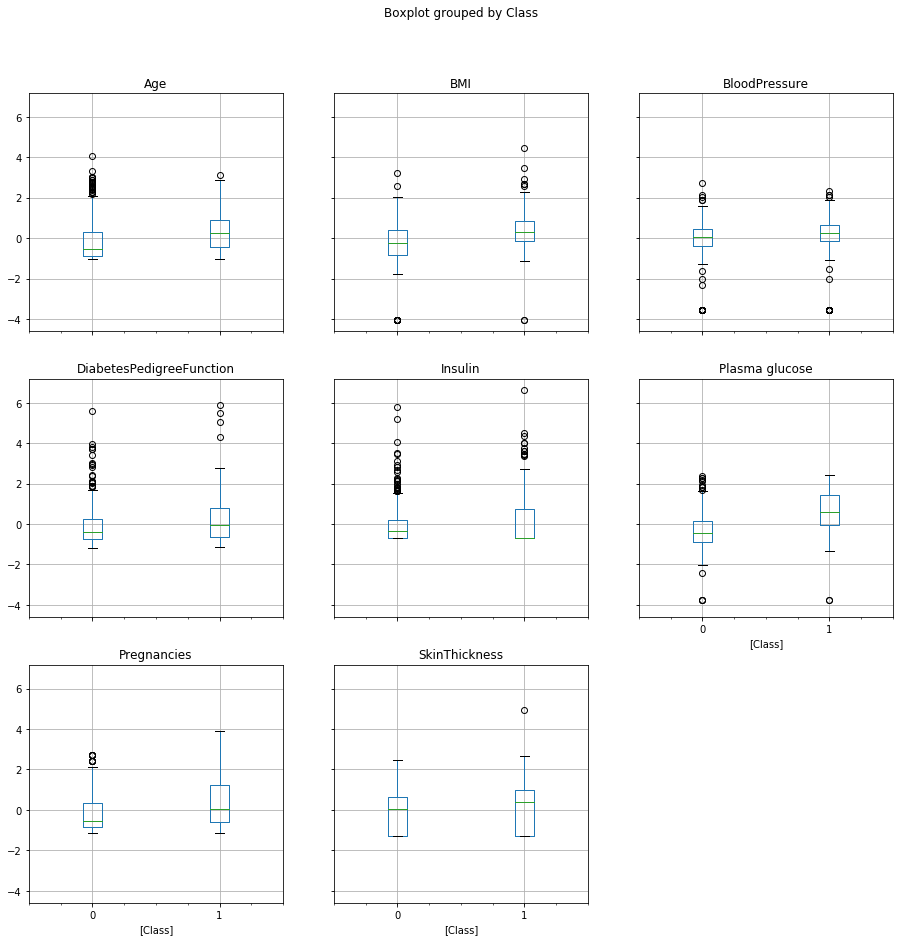

In [23]:
#Plotting the same in Box plot
# byt before that normalizing using standard scalar (zscore)
from scipy.stats import zscore
Dia_scaled_df = df
Dia_scaled_df = Dia_scaled_df.apply(zscore)
Dia_scaled_df["Class"] = df["Class"]
Dia_scaled_df.boxplot(by="Class",figsize=[15,15])

We see the outliers are postively skewed for both the classes even after scalling using mean.. may be minmax scaler is what to be used.

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [24]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

Class                     Class                       1.000000
Pregnancies               Age                         0.544341
Class                     Plasma glucose              0.466581
SkinThickness             Insulin                     0.436783
                          BMI                         0.392573
Plasma glucose            Insulin                     0.331357
BMI                       Class                       0.292695
BloodPressure             BMI                         0.281805
Age                       Plasma glucose              0.263514
BloodPressure             Age                         0.239528
Age                       Class                       0.238356
Pregnancies               Class                       0.221898
BMI                       Plasma glucose              0.221071
BloodPressure             SkinThickness               0.207371
BMI                       Insulin                     0.197859
DiabetesPedigreeFunction  Insulin                     0

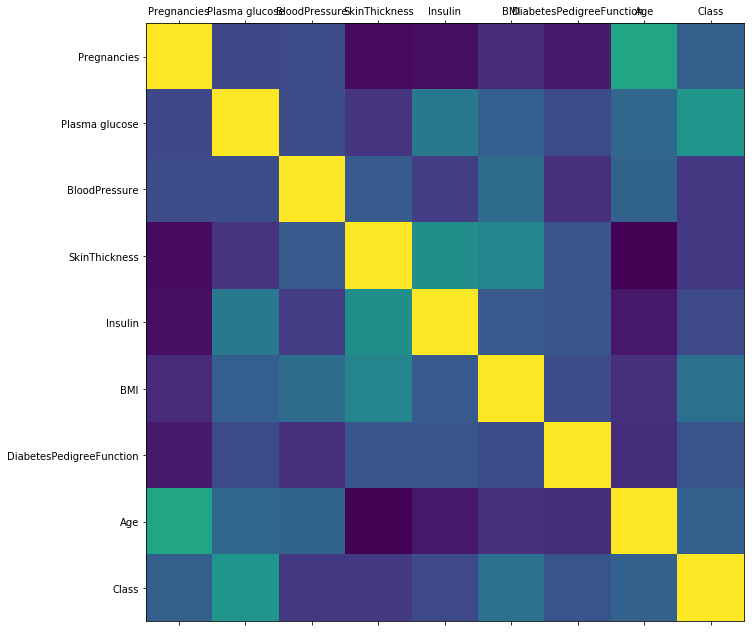

In [25]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize =(size , size))
    ax.matshow(corr) #color code
    plt.xticks(range(len(corr.columns)), corr.columns) #draw xtick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw ytick marks

plot_corr(df)

Not many significant co-related columns and that is good. 

C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


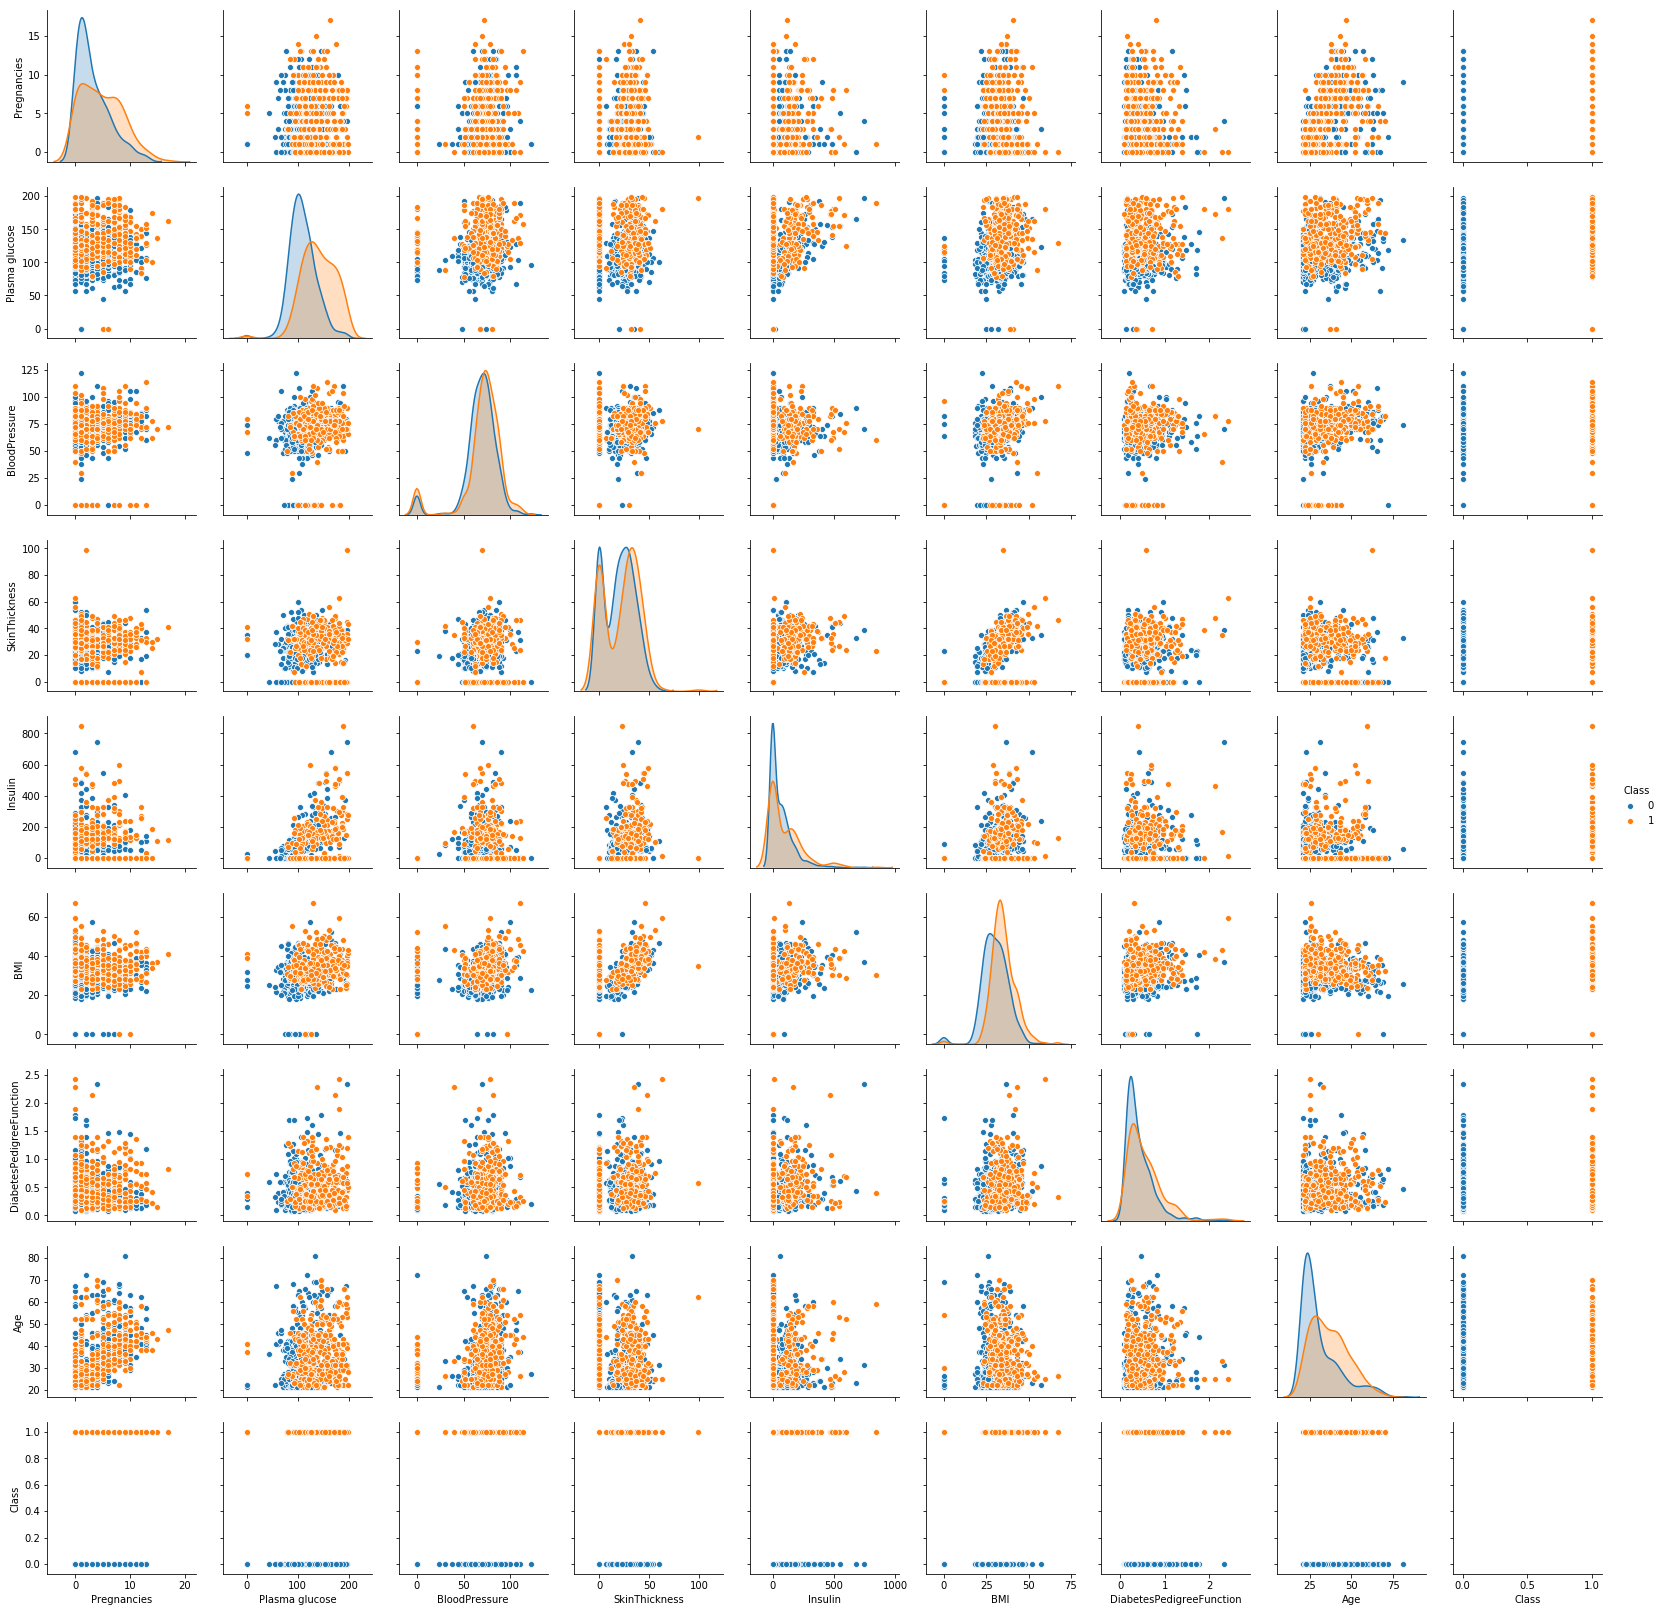

In [26]:
#Lets check their distribution using scatter plot
sns.pairplot(df,diag_kind="kde",hue="Class")

Lot of overlapping values. Guessing model's accuracy wont be that high

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Dia_splt_df = df
x = Dia_splt_df.drop("Class",axis=1,inplace=False)
y = Dia_splt_df["Class"]

In [29]:
print(x.shape,y.shape)

(768, 8) (768,)


In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0,stratify=Dia_splt_df["Class"])

In [78]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(537, 8) (231, 8) (537,) (231,)


### Train Support Vector Machine Model(1 Marks)

In [79]:
from sklearn.svm import SVC

In [80]:
SC = SVC(C=1.0,kernel='linear',random_state = 0)
    

In [81]:
SC.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [82]:
y_predict = SC.predict(x_test)

In [83]:
score = SC.score(x_test,y_test)

In [84]:
from sklearn.metrics import confusion_matrix,roc_auc_score,recall_score
print('Score',score)
print('Confusion Matrix \n',confusion_matrix(y_test, y_predict))
print('Recall Score \n',recall_score(y_test, y_predict))
print('Auc \n',roc_auc_score(y_test, y_predict))

Score 0.7619047619047619
Confusion Matrix 
 [[133  17]
 [ 38  43]]
Recall Score 
 0.5308641975308642
Auc 
 0.7087654320987655


As suspected, recall score is pretty low... its almost close to 0.5 and it means this model's prediction capablity is as good/bad as flip of a coin.

### Scale the data points using MinMaxScaler ( 1 Marks)

In [85]:
from  sklearn.preprocessing import MinMaxScaler
df.shape

(768, 9)

In [86]:
#data_labelled = df.iloc[:,0:8]

In [87]:
#data_labelled.head()

,Pregnancies,Plasma glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [88]:
scaler = MinMaxScaler()


In [102]:
scaler.fit(df)
df_mx = scaler.transform(df)


C:\Users\hp\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [104]:
df_mx = pd.DataFrame(df_mx, columns=df.columns)
df_mx.head()


,Pregnancies,Plasma glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5F5BDEF60>,
      dtype=object)

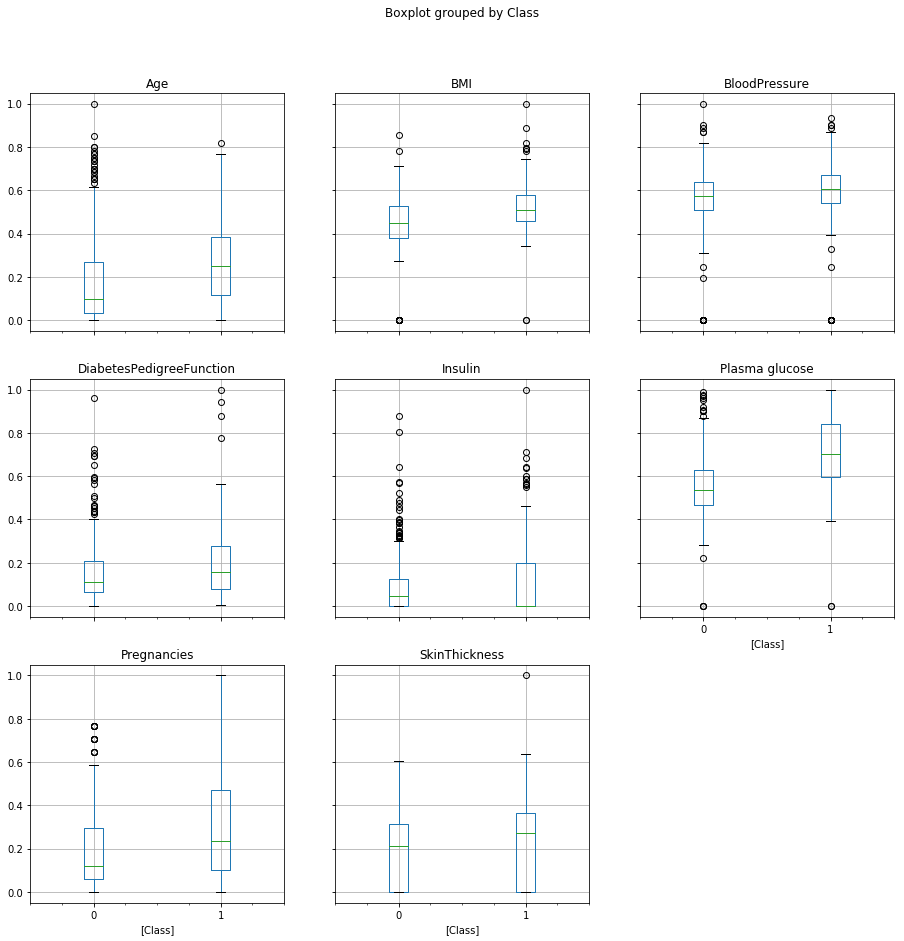

In [105]:
df_mx.boxplot(by='Class', figsize=[15,15])


if you compare above box plot with the one that scalled by zscore, we can understand that minmax scaler did a better job.

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [106]:
Dia_splt_df = df_mx 
x = Dia_splt_df.drop("Class",axis=1,inplace=False)
y = Dia_splt_df["Class"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=Dia_splt_df["Class"])
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [107]:
SC.fit(x_train,y_train)
y_predict = SC.predict(x_test)
score = SC.score(x_test,y_test)
print('Score',score)
print('Confusion Matrix \n',confusion_matrix(y_test, y_predict))
print('Recall Score \n',recall_score(y_test, y_predict))
print('Auc \n',roc_auc_score(y_test, y_predict))

Score 0.78125
Confusion Matrix 
 [[111  14]
 [ 28  39]]
Recall Score 
 0.582089552238806
Auc 
 0.7350447761194031


Though the accuracy and auc has improved but no significant improvement in recall score. 

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [117]:
SC = SVC(C=1000,kernel='linear',random_state = 0)
SC.fit(x_train,y_train)
y_predict = SC.predict(x_test)
score = SC.score(x_test,y_test)
print('Score',score)
print('Confusion Matrix \n',confusion_matrix(y_test, y_predict))
print('Recall Score \n',recall_score(y_test, y_predict))
print('Auc \n',roc_auc_score(y_test, y_predict))

Score 0.7708333333333334
Confusion Matrix 
 [[107  18]
 [ 26  41]]
Recall Score 
 0.6119402985074627
Auc 
 0.7339701492537314


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.

Recall score is mariginally improved and overall accuracy & Auc score is slightly decreased


### Let's try to explore different Kernel and C (Bonus for practice)

In [109]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [110]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,100,500,1000]
              } ]

In [111]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [112]:
gs.fit(x_train, y_train) 

C:\Users\hp\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 100, 500, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [113]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
gs.best_score_ 

0.7777777777777778

#Lets check the recall score for the hyper parameterers suggested by Grid Search

In [116]:
SC = SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

SC.fit(x_train,y_train)
y_predict = SC.predict(x_test)
score = SC.score(x_test,y_test)
print('Score',score)
print('Confusion Matrix \n',confusion_matrix(y_test, y_predict))
print('Recall Score \n',recall_score(y_test, y_predict))
print('Auc \n',roc_auc_score(y_test, y_predict))

Score 0.7760416666666666
Confusion Matrix 
 [[108  17]
 [ 26  41]]
Recall Score 
 0.6119402985074627
Auc 
 0.7379701492537313


As we can see, hyper parameters suggested by gridsearch is having the best score and recall value.